# 2018 New York City Central Park Squirrel Census Data

Source: https://www.thesquirrelcensus.com

Data description:


|Column Name|Description|Data Type|
|:----------|:----------|:--------|
|X|Longitude coordinate for squirrel sighting point|Number|
|Y|Latitude coordinate for squirrel sighting point|Number|
|Unique Squirrel ID|Identification tag for each squirrel sightings. The tag is comprised of "Hectare ID" + "Shift" + "Date" + "Hectare Squirrel Number."|Text|
|Hectare|ID tag, which is derived from the hectare grid used to divide and count the park area. One axis that runs predominantly north-to-south is numerical (1-42), and the axis that runs predominantly east-to-west is roman characters (A-I).|Text|
|Shift|Value is either "AM" or "PM," to communicate whether or not the sighting session occurred in the morning or late afternoon.|Text|
|Date|Concatenation of the sighting session day and month.|date|Text|
|Hectare Squirrel Number|Number within the chronological sequence of squirrel sightings for a discrete sighting session.|Number|
|Age|Value is either "Adult" or "Juvenile."|Text|
|Primary Fur Color|Value is either "Gray," "Cinnamon" or "Black."|Text|
|Highlight Fur Color|Discrete value or string values comprised of "Gray," "Cinnamon" or "Black."|Text|
|Combination of Primary and Highlight Color|A combination of the previous two columns; this column gives the total permutations of primary and highlight colors observed.|Text|
|Color notes|Sighters occasionally added commentary on the squirrel fur conditions. These notes are provided here.|Text|
|Location|Value is either "Ground Plane" or "Above Ground." Sighters were instructed to indicate the location of where the squirrel was when first sighted.|Text|
|Above Ground Sighter Measurement|For squirrel sightings on the ground plane, fields were populated with a value of “FALSE.”|Text|
|Specific Location|Sighters occasionally added commentary on the squirrel location. These notes are provided here.|Text|
|Running|Squirrel was seen running.|Boolean|
|Chasing|Squirrel was seen chasing another squirrel.|Boolean|
|Climbing|Squirrel was seen climbing a tree or other environmental landmark.|Boolean|
|Eating|Squirrel was seen eating.|Boolean|
|Foraging|Squirrel was seen foraging for food.|Boolean|
|Other Activities|Activities other than listed|Text|
|Kuks|Squirrel was heard kukking, a chirpy vocal communication used for a variety of reasons.|Boolean|
|Quaas|Squirrel was heard quaaing, an elongated vocal communication which can indicate the presence of a ground predator such as a dog.|Boolean|
|Moans|Squirrel was heard moaning, a high-pitched vocal communication which can indicate the presence of an air predator such as a hawk.|Boolean|
|Tail flags|Squirrel was seen flagging its tail. Flagging is a whipping motion used to exaggerate squirrel's size and confuse rivals or predators. Looks as if the squirrel is scribbling with tail into the air.|Boolean|
|Tail twitches|Squirrel was seen twitching its tail. Looks like a wave running through the tail, like a breakdancer doing the arm wave. Often used to communicate interest, curiosity.|Boolean|
|Approaches|Squirrel was seen approaching human, seeking food.|Boolean|
|Indifferent|Squirrel was indifferent to human presence.|Boolean|
|Runs from|Squirrel was seen running from humans, seeing them as a threat.|Boolean|
|Other Interactions|Sighter notes on other types of interactions between squirrels and humans.|Text|
|Lat/Long|Latitude and longitude, a geocoded column.|Point as text|

## Load Dataset

In [118]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

folder = r'C:\Users\sofia\Downloads\2018_Central_Park_Squirrel_Census_-_Squirrel_Data_20250731.csv'
df_sq_orig = pd.read_csv(folder)

df_sq = df_sq_orig.copy()

df_sq.tail()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
3018,-73.963943,40.790868,30B-AM-1007-04,30B,AM,10072018,4,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9639431360458 40.7908677445466)
3019,-73.970402,40.782560,19A-PM-1013-05,19A,PM,10132018,5,Adult,Gray,White,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9704015859639 40.7825600069973)
3020,-73.966587,40.783678,22D-PM-1012-07,22D,PM,10122018,7,Adult,Gray,"Black, Cinnamon, White",...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9665871993517 40.7836775064883)
3021,-73.963994,40.789915,29B-PM-1010-02,29B,PM,10102018,2,NaN,Gray,"Cinnamon, White",...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9639941227864 40.7899152327912)
3022,-73.975479,40.769640,5E-PM-1012-01,05E,PM,10122018,1,Adult,Cinnamon,"Gray, White",...,False,False,False,False,False,True,False,False,NaN,POINT (-73.9754794191553 40.7696404489025)


## Cleaning Dataset

#### Columns with missing value counts

In [119]:
missing_value_counts = df_sq.isnull().sum()
missing_data_cols = missing_value_counts[missing_value_counts > 0]

print(missing_data_cols)


Age                                  121
Primary Fur Color                     55
Highlight Fur Color                 1086
Color notes                         2841
Location                              64
Above Ground Sighter Measurement     114
Specific Location                   2547
Other Activities                    2586
Other Interactions                  2783
dtype: int64


### Columns without missing data

In [120]:
not_missing_data = missing_value_counts[missing_value_counts == 0].index

for col in not_missing_data:
    print(col)


X
Y
Unique Squirrel ID
Hectare
Shift
Date
Hectare Squirrel Number
Combination of Primary and Highlight Color
Running
Chasing
Climbing
Eating
Foraging
Kuks
Quaas
Moans
Tail flags
Tail twitches
Approaches
Indifferent
Runs from
Lat/Long


### Keeping all the boolean columns

In [121]:
bool_col = [name for name, col_type in zip(df_sq.columns, df_sq.dtypes) if col_type == 'bool']
print(bool_col)

['Running', 'Chasing', 'Climbing', 'Eating', 'Foraging', 'Kuks', 'Quaas', 'Moans', 'Tail flags', 'Tail twitches', 'Approaches', 'Indifferent', 'Runs from']


In [122]:
cat_col = ['Primary Fur Color', 'Age', 'Shift']
numb_col = ['X','Y','Hectare Squirrel Number']
ordinal_col = ['Date']
# above ground sighter measurement and location are linked so neither will be in the categories to make sure the data does not conflict

#### Dropping columns that I will not be using

In [123]:
df_sq = df_sq.drop(columns=['Color notes', 'Combination of Primary and Highlight Color', 'Highlight Fur Color', 'Other Interactions', 'Color notes', 'Unique Squirrel ID'])
print(df_sq.columns.tolist())


['X', 'Y', 'Hectare', 'Shift', 'Date', 'Hectare Squirrel Number', 'Age', 'Primary Fur Color', 'Location', 'Above Ground Sighter Measurement', 'Specific Location', 'Running', 'Chasing', 'Climbing', 'Eating', 'Foraging', 'Other Activities', 'Kuks', 'Quaas', 'Moans', 'Tail flags', 'Tail twitches', 'Approaches', 'Indifferent', 'Runs from', 'Lat/Long']


### Converting bools to 1,0

In [124]:
df_sq[bool_col] = df_sq[bool_col].astype(int)
df_sq.head()

,X,Y,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Location,Above Ground Sighter Measurement,...,Other Activities,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Lat/Long
0,-73.956134,40.794082,37F,PM,10142018,3,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B,AM,10192018,4,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,0,0,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B,PM,10142018,8,NaN,Gray,Above Ground,10,...,NaN,0,0,0,0,0,0,0,0,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E,PM,10172018,14,Adult,Gray,NaN,NaN,...,NaN,0,0,0,0,0,0,0,1,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E,AM,10172018,5,Adult,Gray,Above Ground,NaN,...,NaN,0,0,0,0,0,0,0,0,POINT (-73.9702676472613 40.7762126854894)


#### Using Simple Imputer to fix missing values in cat_col

In [125]:
from sklearn.impute import SimpleImputer


imputer_str = SimpleImputer(strategy='most_frequent')
#imputer_num = SimpleImputer(strategy='mean')

df_sq[cat_col] = imputer_str.fit_transform(df_sq[cat_col])
#df_sq[numb_col] = imputer_str.fit_transform(df_sq[numb_col])

df_sq.isnull().sum()

X                                      0
Y                                      0
Hectare                                0
Shift                                  0
Date                                   0
Hectare Squirrel Number                0
Age                                    0
Primary Fur Color                      0
Location                              64
Above Ground Sighter Measurement     114
Specific Location                   2547
Running                                0
Chasing                                0
Climbing                               0
Eating                                 0
Foraging                               0
Other Activities                    2586
Kuks                                   0
Quaas                                  0
Moans                                  0
Tail flags                             0
Tail twitches                          0
Approaches                             0
Indifferent                            0
Runs from       

#### Checking for Invalid Entries in catagorical columns

In [126]:
print(df_sq['Primary Fur Color'].unique())
print(df_sq['Age'].unique())
print(df_sq['Shift'].unique())
print(df_sq['Above Ground Sighter Measurement'].unique())

['Gray' 'Cinnamon' 'Black']
['Adult' 'Juvenile' '?']
['PM' 'AM']
[nan '10' 'FALSE' '30' '6' '24' '8' '25' '5' '50' '4' '3' '70' '12' '2'
 '20' '7' '13' '15' '28' '35' '100' '1' '80' '65' '40' '18' '17' '55' '60'
 '180' '9' '45' '0' '43' '16' '33' '11' '23' '31' '14' '19']


#### Getting rid of unexpected value ('?') in Age

In [127]:
entries = ['?']
count = df_sq['Age'].isin(entries).sum()
print(count)

4


In [128]:
df_sq = df_sq[~df_sq['Age'].isin(entries)]
print(df_sq['Age'].unique())

['Adult' 'Juvenile']


#### Generating and Dropping values for columns 'Above Ground Sighter Measurement' and 'Location'

In [129]:
print(df_sq.columns.tolist())

['X', 'Y', 'Hectare', 'Shift', 'Date', 'Hectare Squirrel Number', 'Age', 'Primary Fur Color', 'Location', 'Above Ground Sighter Measurement', 'Specific Location', 'Running', 'Chasing', 'Climbing', 'Eating', 'Foraging', 'Other Activities', 'Kuks', 'Quaas', 'Moans', 'Tail flags', 'Tail twitches', 'Approaches', 'Indifferent', 'Runs from', 'Lat/Long']


In [130]:
df_sq['Above Ground Height'] = df_sq.apply(
    lambda row: row['Above Ground Sighter Measurement'] if row['Location'] == 'Above Ground' else 0,
    axis=1
)
df_sq.drop(columns=['Above Ground Sighter Measurement'], inplace=True)
df_sq.dropna(subset=['Above Ground Height', 'Location'], inplace=True)
print(df_sq['Above Ground Height'].unique())

['10' 0 '30' '6' '24' '8' '25' '5' '50' '4' '3' '70' '12' '2' '20' '7'
 '13' '15' '28' '35' '100' '1' '80' '65' '40' '18' '17' '55' '60' '180'
 '9' '45' '0' '43' '16' '33' '11' '23' '31' '14' '19']


### Encoding remaining catagorical data

I created a new variable df_sq_dt for the decision tree so that I could use primary fur before encoding with KNN for multi-class classification

In [131]:
df_sq = pd.get_dummies(df_sq, columns=['Location'])
df_sq = pd.get_dummies(df_sq, columns=['Age'])
df_sq = pd.get_dummies(df_sq, columns=['Shift'])
df_sq_dt = pd.get_dummies(df_sq, columns=['Primary Fur Color'])

In [132]:
#df_sq_dt['Lat/Long'] = pd.to_numeric(df_sq['Lat/Long'], errors='coerce')
df_sq_dt['Above Ground Height'] = pd.to_numeric(df_sq['Above Ground Height'], errors='coerce')
df_sq['Above Ground Height'] = pd.to_numeric(df_sq['Above Ground Height'], errors='coerce')



# Binary Classification
## Decision Tree

I did this test with all the columns: Primary Fur Color, Shift, Age, Runs From, Indifferent, Approaches, Tail twitches, tail flag, moans, Quaas, Kuks, Foraging, Eating, Chasing, Running, Hectare Squirrel Number, Date, X, Y. I removed a couple of features because they were either redundant, irrelevant or were to closely related to y (Location above ground)

In [178]:
from sklearn.model_selection import train_test_split

X = df_sq_dt.drop(columns=['Above Ground Height','Location_Ground Plane','Location_Above Ground', 'Other Activities', 'Specific Location', 'Hectare', 'Lat/Long'])

y = df_sq_dt['Location_Above Ground']
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2,  random_state=42)

### Checking for class imbalance
After running the script I found that there were some inconsistencies in results which I found to be class imbalance after running this script. For the decision tree I decided to use class weights to balance the model and it worked pretty well

In [134]:
y.value_counts(normalize= True)

Location_Above Ground
False    0.728055
True     0.271945
Name: proportion, dtype: float64

### Creating the Model

In [179]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(class_weight='balanced', random_state= 42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

### Visualizing Feature Importance
This section under each model will show both the graph and data from feature importance. I used this section to see what features should be eliminated in the second iteration
#### Graph

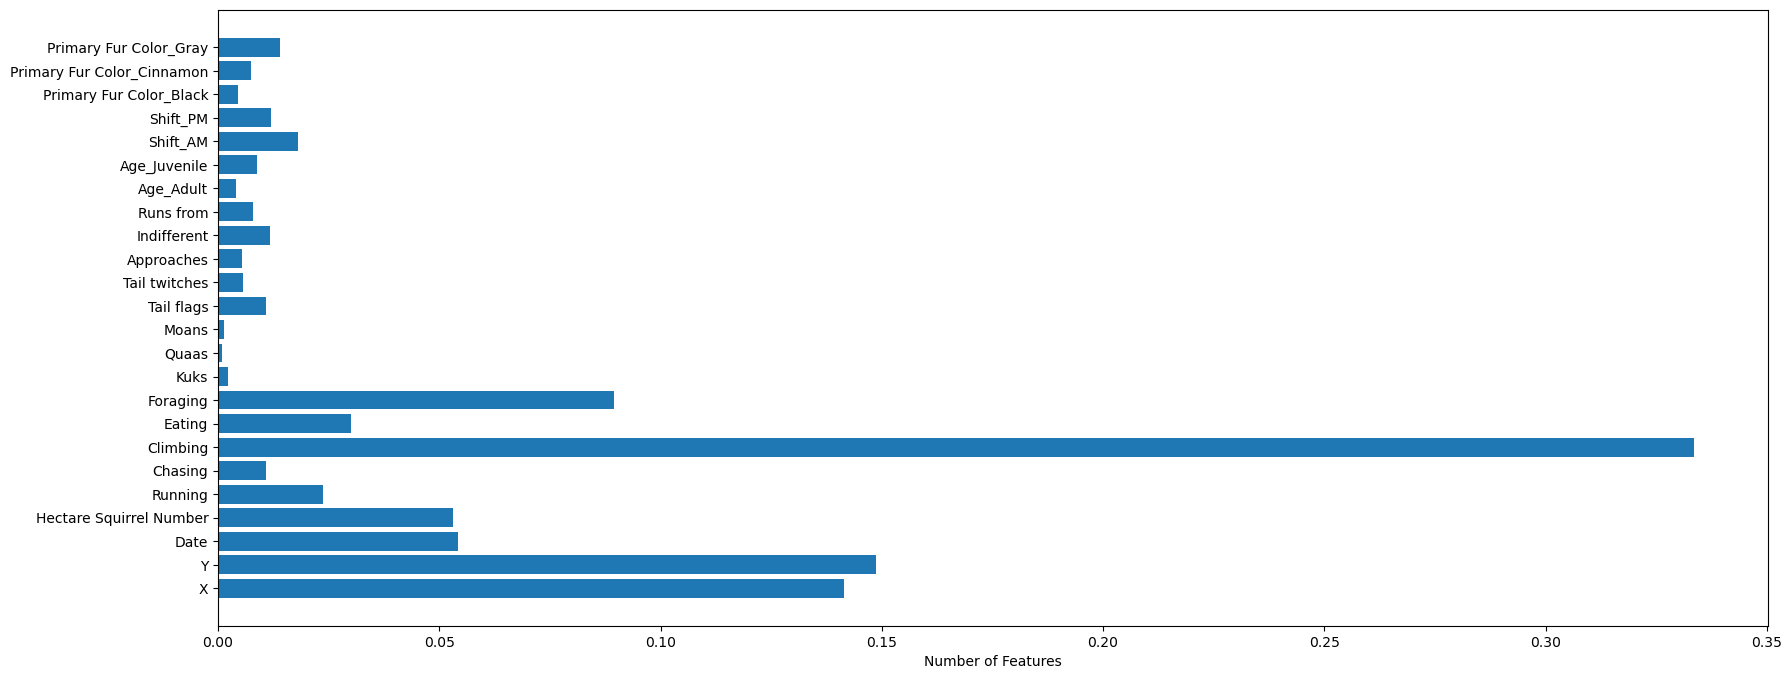

In [180]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
plt.barh(X.columns, dt_clf.feature_importances_)
plt.xlabel('Number of Features')
plt.show()


#### Data
There are a lot of features that meet the criteria I set to be unimportant in this dataset

In [181]:
feature_name = X_train.columns

feature_importance = dt_clf.feature_importances_
for i, importance in enumerate(feature_importance):
    if importance < .01:
        print('Feature',feature_name[i] , ':', importance)

Feature Kuks : 0.0023288721582311214
Feature Quaas : 0.00097130581555942
Feature Moans : 0.001384765752425709
Feature Tail twitches : 0.005540753312245681
Feature Approaches : 0.0054008136004107705
Feature Runs from : 0.007990767884910219
Feature Age_Adult : 0.004042028980158911
Feature Age_Juvenile : 0.008807936863742037
Feature Primary Fur Color_Black : 0.004388641821619332
Feature Primary Fur Color_Cinnamon : 0.00743828816095222


### Performance
the model did pretty well especially after I balance the classes. But I think it will still do better after I remove some of the unimportant features

In [182]:
from sklearn.metrics import accuracy_score, precision_score

print('Decision Tree Performance:')
print('Accuracy: ', accuracy_score(y_test, y_pred_dt))
print('Precision:', precision_score(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt)
print('Confusion Matrix:', cm_dt)

Decision Tree Performance:
Accuracy:  0.8192771084337349
Precision: 0.6644295302013423
Confusion Matrix: [[377  50]
 [ 55  99]]


### Decision Tree version 1 Summary
The performance of the model was not bad, but there were a lot of unimportant features in the next version will go through all the the features and eliminate then from X depending on performacne. With the results from the feature importance I decided to eliminate a couple of columns to see if it will change the results: 'Quaas','Moans','Kuks', 'Runs from', 'Shift_PM', 'Age_Adult', and 'Tail twitches'

## Decision Tree: version 2

### Creating new X and Y without unimportant features

In [188]:
X2 = df_sq_dt.drop(columns=['Above Ground Height','Location_Ground Plane','Location_Above Ground', 'Other Activities', 'Specific Location', 'Hectare', 'Lat/Long','Quaas','Moans','Kuks',  'Runs from', 'Shift_PM', 'Age_Adult', 'Tail twitches'])
#'Quaas', 'Kuks',  'Tail twitches', 'Moans', 'Age_Adult', 'Age_Juvenile', 'Runs from', 'Approaches', 'Indifferent'

y2 = df_sq_dt['Location_Above Ground']
X_train2, X_test2, y_train2, y_test2  = train_test_split(X2, y2, test_size=0.2,  random_state=42)

### Creating the Model

In [189]:
dt_clf2 = DecisionTreeClassifier( class_weight= 'balanced', random_state=42)
dt_clf2.fit(X_train2, y_train2)
y_pred_dt2 = dt_clf2.predict(X_test2)

### Visualizing Feature Importance
#### Graph

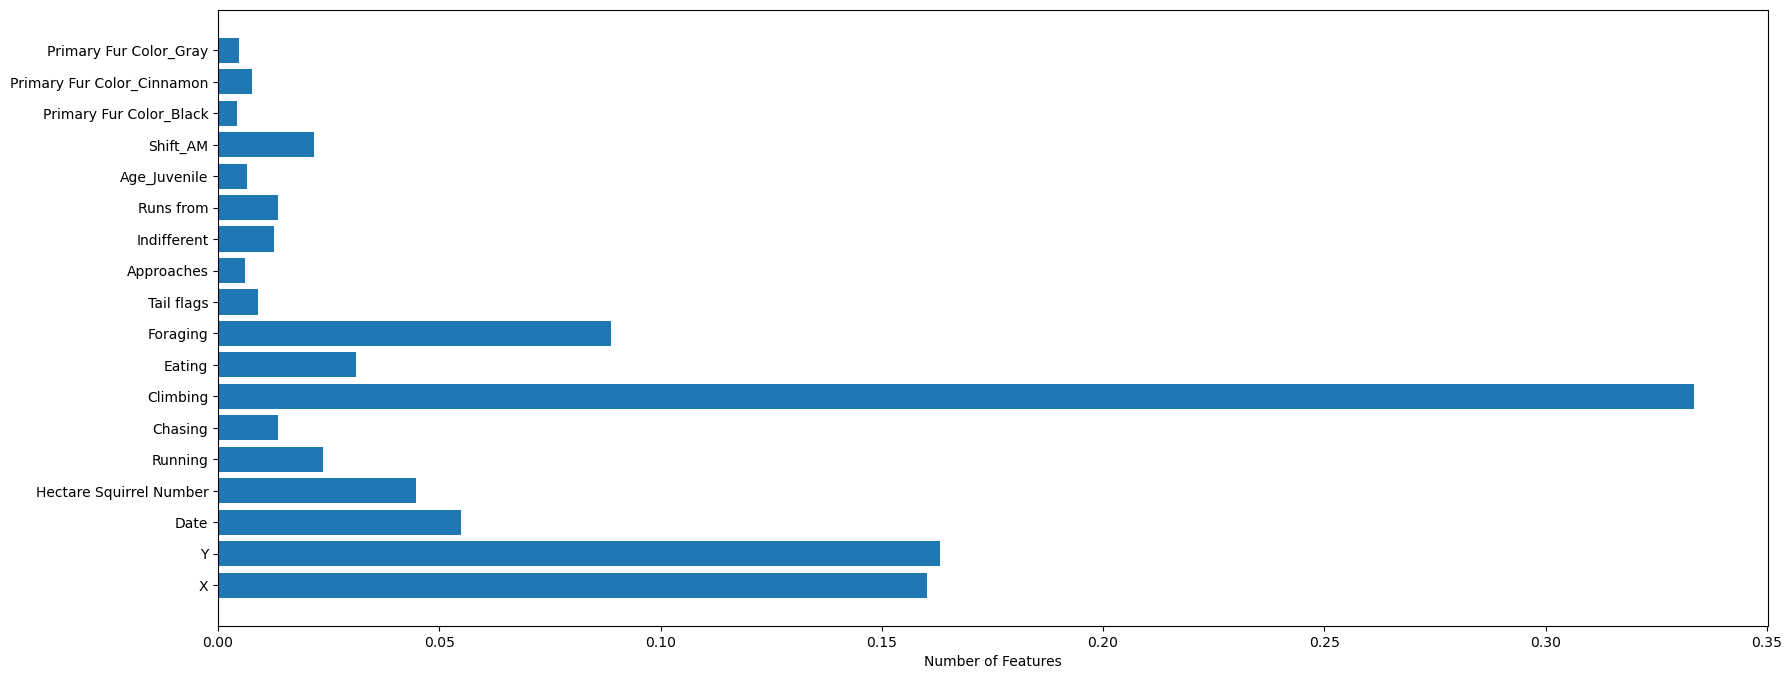

In [190]:
plt.figure(figsize=(20,8))
plt.barh(X2.columns, dt_clf2.feature_importances_)
plt.xlabel('Number of Features')
plt.show()

#### Data
There are still a lot of unimportant features, but I have found that when I remove them it drastically decreases performance. I think this is because the tree relies on these unimportant features after I pruned so many of them off

In [191]:
feature_name = X_train2.columns

feature_importance = dt_clf2.feature_importances_
for i, importance in enumerate(feature_importance):
    if importance < .01:
        print('Feature',feature_name[i] , ':', importance)

Feature Tail flags : 0.009113814215820953
Feature Approaches : 0.006046900043920331
Feature Age_Juvenile : 0.0066074860358800586
Feature Primary Fur Color_Black : 0.004253805478350298
Feature Primary Fur Color_Cinnamon : 0.007666480235865358
Feature Primary Fur Color_Gray : 0.004678299221073872


### Performance
This round did a lot better than the first one

In [192]:
print('Decision Tree Performance:')
print('Accuracy: ', accuracy_score(y_test2, y_pred_dt2))
print('Precision:', precision_score(y_test2, y_pred_dt2))

cm_dt2 = confusion_matrix(y_test2, y_pred_dt2)
print('Confusion Matrix:', cm_dt2)

Decision Tree Performance:
Accuracy:  0.8227194492254734
Precision: 0.6688741721854304
Confusion Matrix: [[377  50]
 [ 53 101]]


### Decision Tree version 2 Summary
I found that just listing all the unimportant features will not always improve performace and I found that I had to go feature by feature to find the best move for the model

# Multi-class Classification


Side note: All the Random Forest code was created after KNN and I reference it as so. I could not move the cells to where they were supposed to go. Jupyter notebooks kept on deleting and duplicating random cells after freezing my computer, so I decided against moving them to where they belong (I had no other issue with jupyter notebooks just that)

### Test Train Split
I plan on using these X and y for the first version of both the knn model and the random forest model

In [144]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

X_mc = df_sq.drop(columns=['Other Activities', 'Specific Location', 'Hectare', 'Lat/Long','Primary Fur Color' ])
y_mc = df_sq['Primary Fur Color']

X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_mc, y_mc, test_size=0.2, random_state=42)

### Checking for Class imabalance
After running this code I found that there is a large  class imbalance. In Random forest I used 'balanced for the class weights. In the KNN I use RandomOverSampling on just the minority class. I also used a small number for N_neighbors

In [145]:
y_mc.value_counts(normalize= True)

Primary Fur Color
Gray        0.833735
Cinnamon    0.131153
Black       0.035112
Name: proportion, dtype: float64

## Random Forest: version 1

### Creating the Model

In [146]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(n_estimators=500, max_depth=9,min_samples_leaf= 3, min_samples_split=10,class_weight='balanced_subsample')
rf1.fit(X_train_k, y_train_k)
y_pred_rf1 = rf1.predict(X_test_k)


### Visualizing the Feature Importance
#### The graph

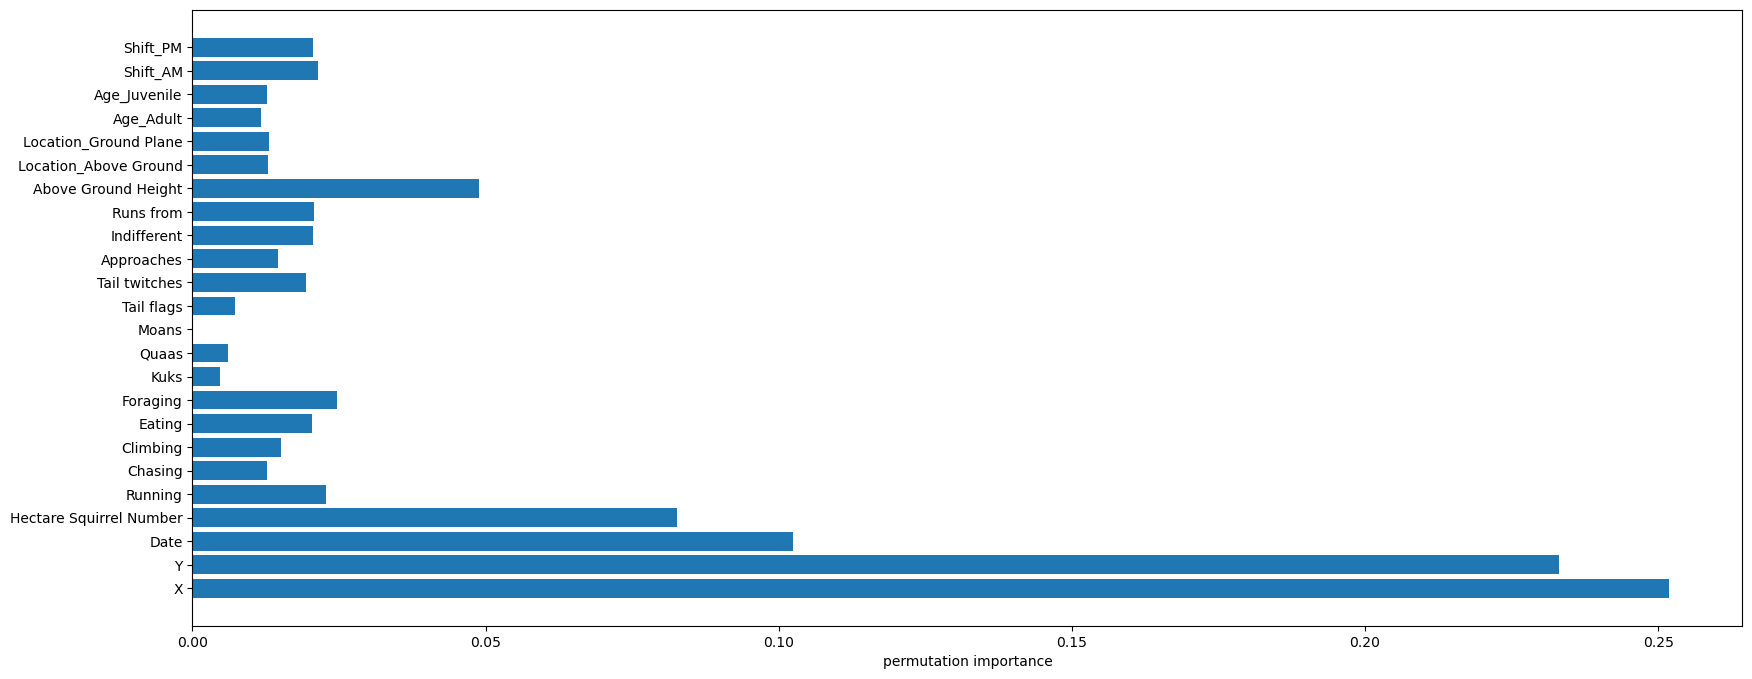

In [147]:
plt.figure(figsize=(20,8))
plt.barh(X_mc.columns, rf1.feature_importances_)
plt.xlabel('permutation importance')
plt.show()

#### The numbers
only 4 features in this dataset are low enough to be considered unimportant

In [148]:
feature_name = X_train_k.columns

feature_importance = rf1.feature_importances_
for i, importance in enumerate(feature_importance):
    if importance < .01:
        print('Feature',feature_name[i] , ':', importance)

Feature Kuks : 0.004747638219181483
Feature Quaas : 0.0061338834725110135
Feature Moans : 0.0
Feature Tail flags : 0.007323354470846696


### Performance
The performance is much better than the KNN already but in order to really say that it is better I will have to fix the oversampling I can see in the graph below

In [149]:
print('Random Forest Performance:')
print('Accuracy: ', accuracy_score(y_test_k, y_pred_rf1))
print('classification report:\n', classification_report(y_test_k, y_pred_rf1))
print('confusion matrix:\n', confusion_matrix(y_test_k, y_pred_rf1))

Random Forest Performance:
Accuracy:  0.774526678141136
classification report:
               precision    recall  f1-score   support

       Black       0.29      0.21      0.24        24
    Cinnamon       0.33      0.41      0.37        73
        Gray       0.88      0.86      0.87       484

    accuracy                           0.77       581
   macro avg       0.50      0.49      0.49       581
weighted avg       0.78      0.77      0.78       581

confusion matrix:
 [[  5   1  18]
 [  2  30  41]
 [ 10  59 415]]


### Validation Curve
This shows some severe oversampling

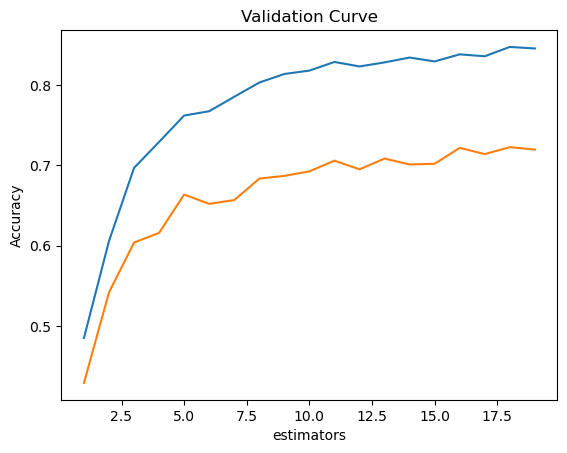

In [150]:
from sklearn.model_selection import validation_curve
import numpy as np

param_range = range(1,20)
train_scores, test_scores = validation_curve( RandomForestClassifier(n_estimators=500, max_depth=9,min_samples_leaf= 3, min_samples_split=10,class_weight='balanced_subsample'), X_train_k, y_train_k, param_name='n_estimators', param_range=param_range, cv =5, scoring='accuracy')

train_mean = np.mean(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)

plt.plot(param_range, train_mean, label='Training Accuracy')
plt.plot(param_range, test_mean, label='Test Accuracy')
plt.xlabel('estimators')
plt.ylabel('Accuracy')
plt.title('Validation Curve')
plt.show()

### Random Forest version 1 Summary:
At first this model did way worse than knn and I thought maybe I was moving in the wrong direction, but after some research I decided to mess with the hyperparameters. That also didn't do better at first but after a while I saw some drastic improvement and I decided to stick with the model

## RandomForest: version 2

In [151]:

from sklearn.metrics import classification_report

X_mc2 = df_sq.drop(columns=['Other Activities', 'Specific Location', 'Hectare', 'Lat/Long','Primary Fur Color', 'Kuks','Quaas','Moans' ])



X_train_r2, X_test_r2, y_train_r2, y_test_r2 = train_test_split(X_mc2, y_mc, test_size=0.2, random_state=42)

### OverSampling
I tried using a different oversampler than before to see if the results would improve

In [152]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state= 42)
X_rs,y_rs = smote.fit_resample(X_train_r2, y_train_r2)

### Creating the Model

In [153]:
from sklearn.ensemble import RandomForestClassifier



rf2 = RandomForestClassifier(n_estimators=500, max_depth=9,min_samples_leaf= 3, min_samples_split=10,class_weight='balanced_subsample')
rf2.fit(X_test_r2, y_test_r2)
y_pred_rf1 = rf2.predict(X_test_r2)

### Visualizing the Feature Importance
#### The graph

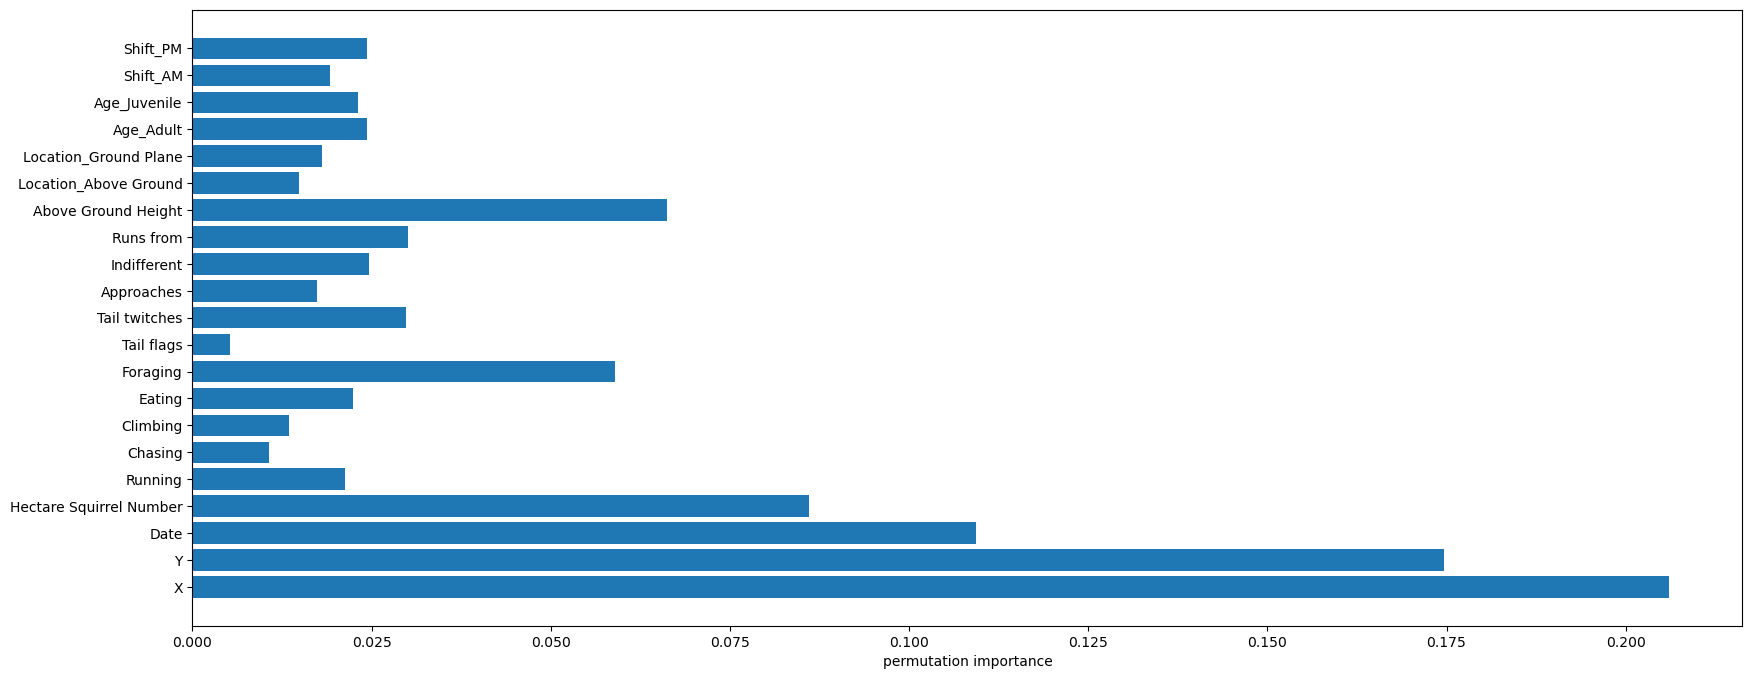

In [154]:
plt.figure(figsize=(20,8))
plt.barh(X_mc2.columns, rf2.feature_importances_)
plt.xlabel('permutation importance')
plt.show()

#### Data

In [155]:
feature_name = X_train_r2.columns

feature_importance = rf2.feature_importances_
for i, importance in enumerate(feature_importance):
    if importance < .01:
        print('Feature',feature_name[i] , ':', importance)

Feature Tail flags : 0.005228266246355325


### Evaluating Performance
Overall the results are not as good as the last one but after looking at the validation curve I saw that there was less oversamping which mean that I moved in a positive direction

In [156]:
print('Random Forest Performance:')
print('Accuracy: ', accuracy_score(y_test_k, y_pred_rf1))
print('classification report:\n', classification_report(y_test_k, y_pred_rf1))
print('confusion matrix:\n', confusion_matrix(y_test_k, y_pred_rf1))

Random Forest Performance:
Accuracy:  0.9604130808950087
classification report:
               precision    recall  f1-score   support

       Black       1.00      1.00      1.00        24
    Cinnamon       0.82      0.88      0.85        73
        Gray       0.98      0.97      0.98       484

    accuracy                           0.96       581
   macro avg       0.93      0.95      0.94       581
weighted avg       0.96      0.96      0.96       581

confusion matrix:
 [[ 24   0   0]
 [  0  64   9]
 [  0  14 470]]


### Validation Curve
This curve looks much better than the first I have not been able to get it better than this

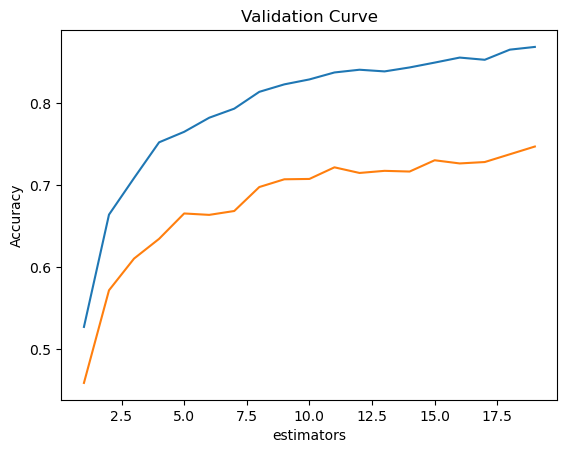

In [157]:
from sklearn.model_selection import validation_curve
import numpy as np

param_range = range(1,20)
train_scores, test_scores = validation_curve( RandomForestClassifier(n_estimators=500, max_depth=9,min_samples_leaf= 3, min_samples_split=10,class_weight='balanced_subsample'), X_train_r2, y_train_r2, param_name='n_estimators', param_range=param_range, cv =5, scoring='accuracy')

train_mean = np.mean(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)

plt.plot(param_range, train_mean, label='Training Accuracy')
plt.plot(param_range, test_mean, label='Test Accuracy')
plt.xlabel('estimators')
plt.ylabel('Accuracy')
plt.title('Validation Curve')
plt.show()

### Random Forest Summary
Overall I think the Random Forest did well. There was some over fitting that I was not able to fix it completely but it was much better the second round.

## KNN: version 1

### Fixing Class imbalance: Oversampling
I wanted to only oversample the black squirrels, because oversampling everything was not working. After doing some research I found this class and decided to use it and it fixed the problem

In [158]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

ros = RandomOverSampler(sampling_strategy={'Black':300}, random_state=42)
X_resampled,y_resampled = ros.fit_resample(X_train_k, y_train_k)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_resampled)
X_test_sc = scaler.transform(X_test_k)

### Creating the Model

In [159]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors=3, weights = 'distance')
knn1.fit(X_train_sc, y_resampled)

y_pred_k = knn1.predict(X_test_sc)


### Visualizing Feature Importance
#### Graph

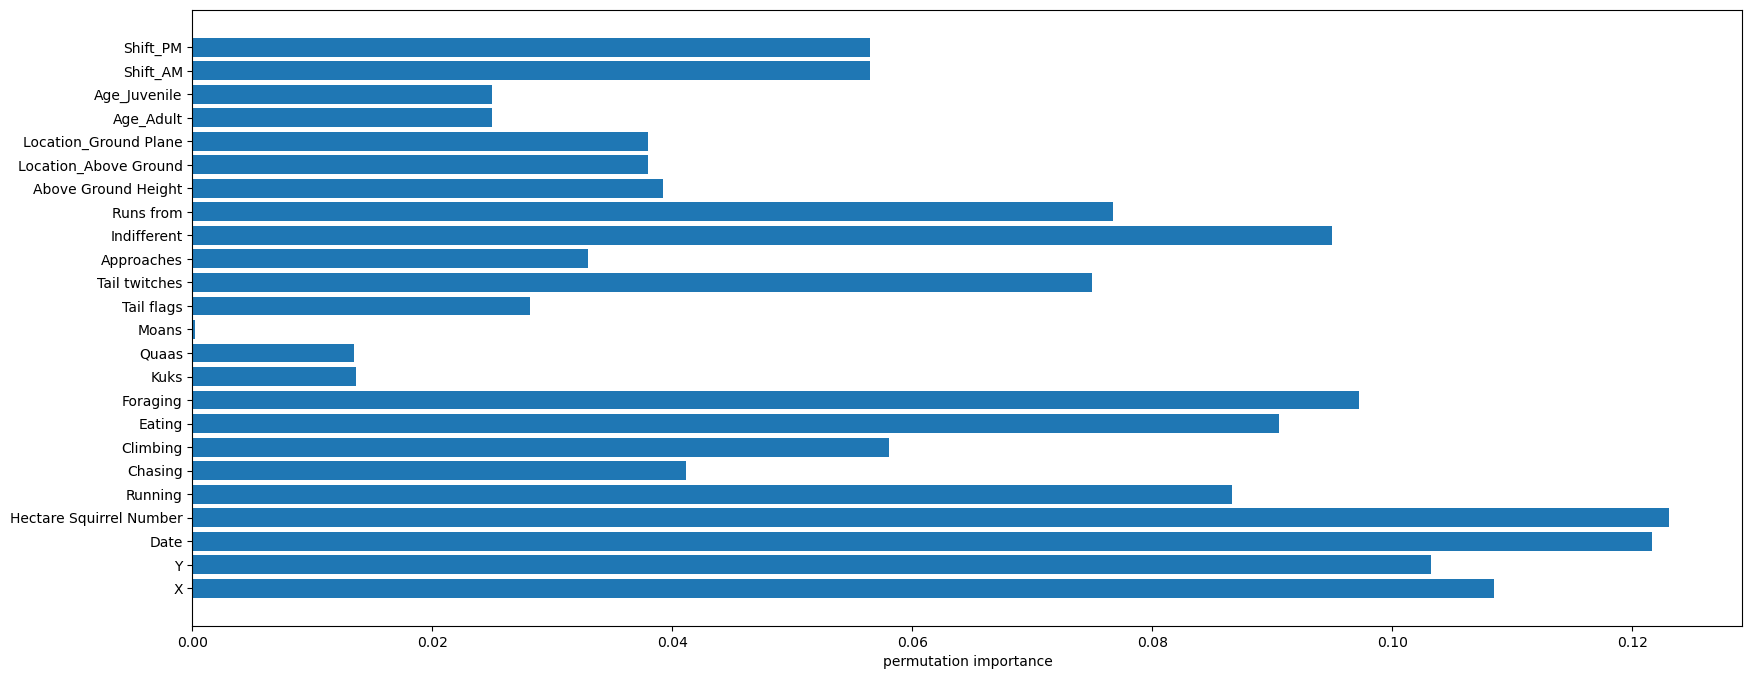

In [160]:
from sklearn.inspection import permutation_importance

output = permutation_importance(estimator=knn1, X=X_train_sc, y=y_resampled,  n_repeats=10, random_state=42, scoring='accuracy', n_jobs=1)

plt.figure(figsize=(20,8))
plt.barh(X_mc.columns, output.importances_mean)
plt.xlabel('permutation importance')
plt.show()

#### Raw Data
The only feature that could be considered unimportant is Moans. I think after I remove that from the dataset there will be more unimportant features that will emerge.

In [161]:
feature_name = X_train_k.columns

feature_importance = output.importances_mean
for i, importance in enumerate(feature_importance):
    if importance < .01:
        print('Feature',feature_name[i] , ':', importance)

Feature Moans : 0.0002356637863315081


### Performance
the model did nto do very well with the black squirrel predictions, but did very well on the grey squirrel. This means that oversampling did not fix everything so in the next version I am going to change the hyperparameters

In [162]:
print('KNN Performance:')
print('Accuracy: ', accuracy_score(y_test_k, y_pred_k))
print('classification report:\n', classification_report(y_test_k, y_pred_k))
print('confusion matrix:\n', confusion_matrix(y_test_k, y_pred_k))

KNN Performance:
Accuracy:  0.7762478485370051
classification report:
               precision    recall  f1-score   support

       Black       0.08      0.12      0.10        24
    Cinnamon       0.36      0.16      0.23        73
        Gray       0.85      0.90      0.88       484

    accuracy                           0.78       581
   macro avg       0.43      0.40      0.40       581
weighted avg       0.76      0.78      0.76       581

confusion matrix:
 [[  3   0  21]
 [  6  12  55]
 [ 27  21 436]]


### Checking for Overfitting
This graph does not look great I am going to rework the hyperparameters and change the weights

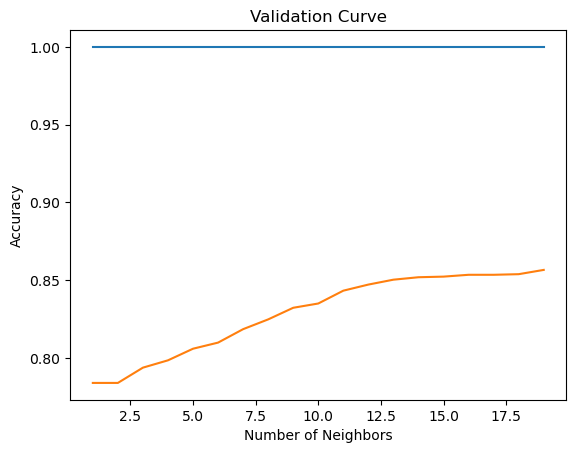

In [163]:


param_range = range(1,20)
train_scores, test_scores = validation_curve( KNeighborsClassifier(n_neighbors=3, weights = 'distance'), X_train_sc, y_resampled, param_name='n_neighbors', param_range=param_range, cv =5, scoring='accuracy')

train_mean = np.mean(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)

plt.plot(param_range, train_mean, label='Training Accuracy')
plt.plot(param_range, test_mean, label='Test Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Validation Curve')
plt.show()

## KNN: version 2
### Test Train Split and Removing unimportant features

In [164]:
X_knn2 = df_sq.drop(columns=['Other Activities', 'Specific Location', 'Hectare', 'Lat/Long','Primary Fur Color', 'Moans','Location_Ground Plane', 'Age_Juvenile', 'Age_Adult', 'Shift_PM' ])


X_train_k2, X_test_k2, y_train_k2, y_test_k2 = train_test_split(X_knn2, y_mc, test_size=0.2, random_state=42)

### Fixing CLass Imbalance: Oversampling

In [165]:
warnings.filterwarnings("ignore", category=FutureWarning)

X_resampled2,y_resampled2 = ros.fit_resample(X_train_k2, y_train_k2)

scaler = StandardScaler()
X_train_sc2 = scaler.fit_transform(X_resampled2)
X_test_sc2 = scaler.transform(X_test_k2)

### Creating the Model

In [166]:
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train_sc2, y_resampled2)

y_pred_k2 = knn2.predict(X_test_sc2)

### Visualizing Features Importance
#### Graph

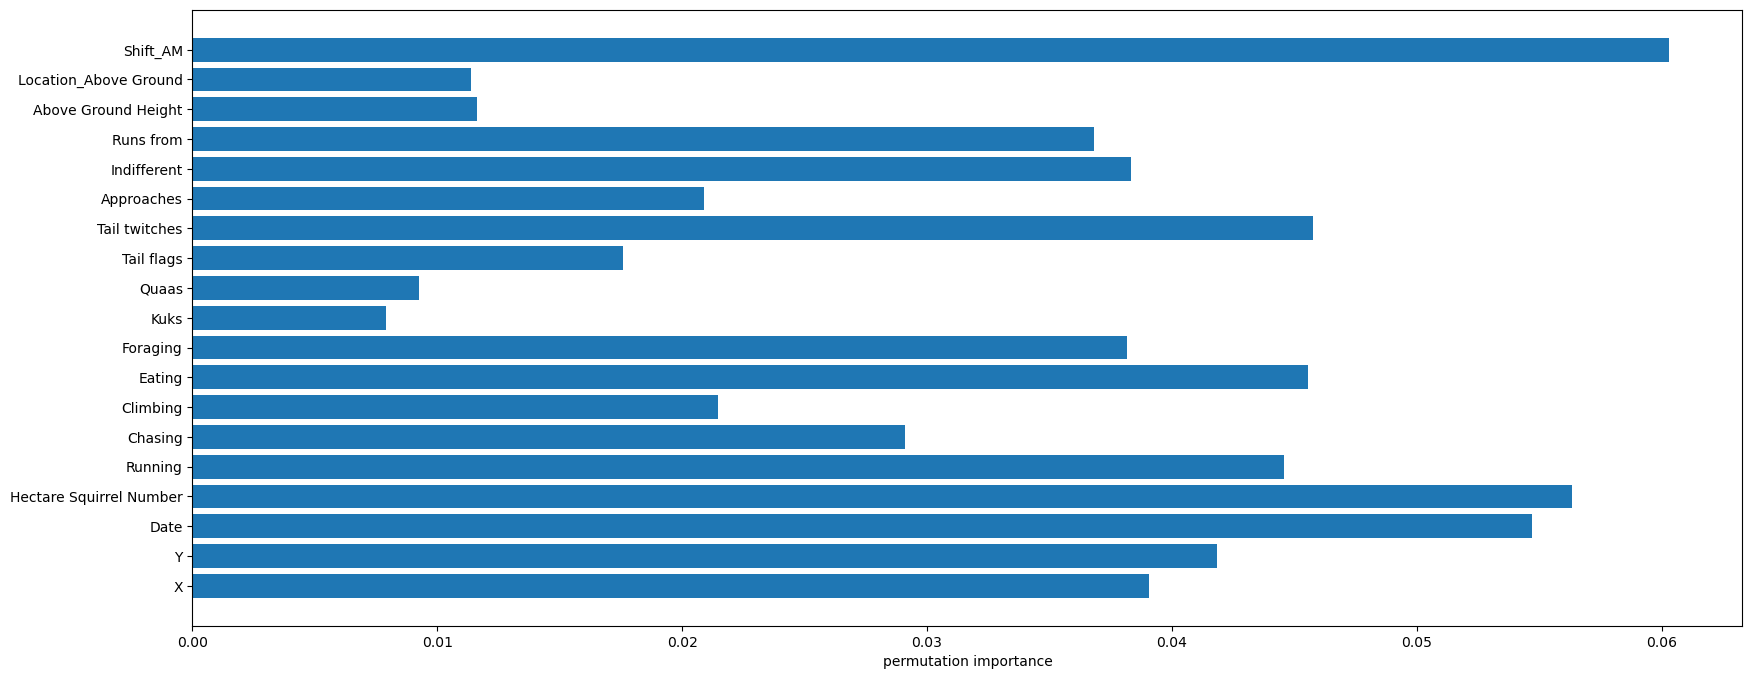

In [167]:
output2 = permutation_importance(estimator=knn2, X=X_train_sc2, y=y_resampled2,  n_repeats=10, random_state=42, scoring='accuracy', n_jobs=1)

plt.figure(figsize=(20,8))
plt.barh(X_knn2.columns, output2.importances_mean)
plt.xlabel('permutation importance')
plt.show()

#### Raw Data

In [168]:
feature_name = X_train_k2.columns

feature_importance = output2.importances_mean
for i, importance in enumerate(feature_importance):
    if importance < .01:
        print('Feature',feature_name[i] , ':', importance)

Feature Kuks : 0.007894736842105288
Feature Quaas : 0.009269442262372352


### Performance

In [169]:
print('KNN Performance:')
print('Accuracy: ', accuracy_score(y_test_k2, y_pred_k2))
print('classification report:\n', classification_report(y_test_k2, y_pred_k2))
print('confusion matrix:\n', confusion_matrix(y_test_k2, y_pred_k2))

KNN Performance:
Accuracy:  0.76592082616179
classification report:
               precision    recall  f1-score   support

       Black       0.09      0.17      0.12        24
    Cinnamon       0.34      0.15      0.21        73
        Gray       0.85      0.89      0.87       484

    accuracy                           0.77       581
   macro avg       0.43      0.40      0.40       581
weighted avg       0.76      0.77      0.76       581

confusion matrix:
 [[  4   1  19]
 [  7  11  55]
 [ 34  20 430]]


### Checking for Overfitting

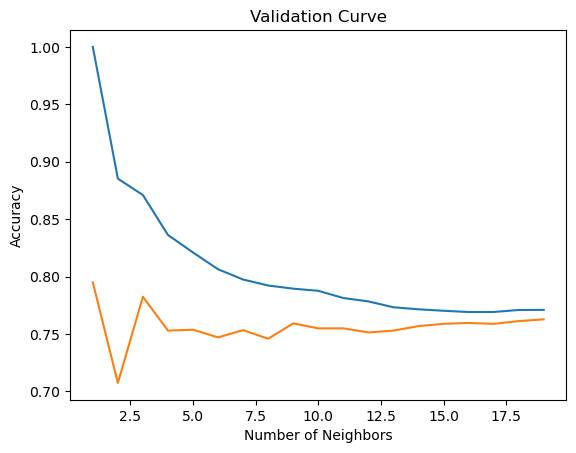

In [170]:
param_range = range(1,20)
train_scores, test_scores = validation_curve( KNeighborsClassifier(n_neighbors=3), X_train_sc2, y_resampled2, param_name='n_neighbors', param_range=param_range, cv =5, scoring='accuracy')

train_mean = np.mean(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)

plt.plot(param_range, train_mean, label='Training Accuracy')
plt.plot(param_range, test_mean, label='Test Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Validation Curve')
plt.show()

## Summary

        Overall I learned a lot of new things. I feel that I have a much better understanding of how hyperparameters, cleaning, and balancing the dataset impact the models. I think I learned the most from the multi-class classification and while cleaning the data.
    For the multi-class classification I started with KNN because I was unaware of the class imbalance. As I started running the model I realized that it was not predicting any black squirrels. After much research I found some way to deal with class imbalance and changed the hyper parameters.
    Even after that the results were not that great and I ended up looking at other models to see if I could get better results. I decided to use RandomForest. It took a lot of hyper parameter tuning and I think it would have been easier to use a pipeline, but I still learned a lot about each of the hyperparameters in Random Forest.
    After I saw all the results from both models I realized that because of the changes I made to fix the class imbalance I was probably at risk for oversampling and I decided to add a validation curve to check. I ended up changing all of the hyperparameters , because they were all oversampling.
    The next thing that I mentioned learning the most from was the cleaning. There were a lot of issues with the dataset because the data was from self reports. There were also a lot of different data types and some of the answers in one column were linked to others. Overall it took longer than creating both of the models. But surprisingly I learned a lot about the models through the data cleaning.

